In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [2]:
X = loadmat('PaviaU.mat')['paviaU']
y = loadmat('PaviaU_gt.mat')['paviaU_gt']

In [3]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (610, 340, 103)
y: (610, 340)


In [4]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

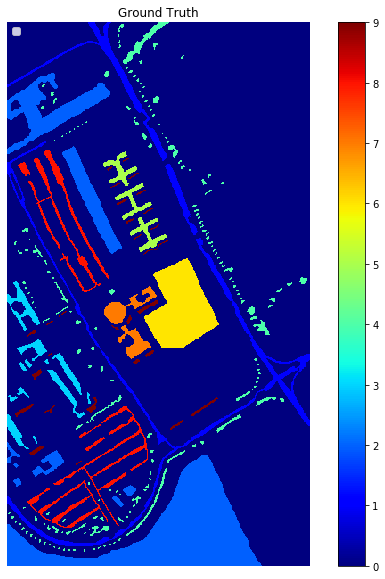

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], loc='upper left')
#plt.savefig('ground_truth.png')
plt.show()

In [6]:
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [7]:
y = y.ravel()

In [8]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (207400, 103)
y: (207400,)


In [9]:
label,counts=np.unique(y,return_counts=True)
print(label)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[164624   6631  18649   2099   3064   1345   5029   1330   3682    947]


In [10]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
scaler_model.fit(X.astype(float))
X=scaler_model.transform(X)

In [11]:
print(X.shape)
print(y.shape)

(207400, 103)
(207400,)


In [24]:
label_tr,counts_tr=np.unique(y_train,return_counts=True)
label_te,counts_te=np.unique(y_test,return_counts=True)
print(pd.DataFrame(counts_tr,label_tr))
print(pd.DataFrame(counts_te,label_te))

        0
0  123468
1    4973
2   13987
3    1574
4    2298
5    1009
6    3772
7     997
8    2762
9     710
       0
0  41156
1   1658
2   4662
3    525
4    766
5    336
6   1257
7    333
8    920
9    237


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25, stratify=y )

In [13]:
print(X_train.shape)
print(X_test.shape)

(155550, 103)
(51850, 103)


In [14]:
#Applying Scalar to train and test Dataset

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
#Appplying SVM 

from sklearn.svm import SVC
from sklearn import metrics

In [16]:
clf = SVC(C=100,gamma=0.01,decision_function_shape='ovo')

In [17]:
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics

In [20]:
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy : 84.17164898746384


In [21]:
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)

Cohen Kappa Score : 43.861578083437614


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

C:\Users\THIS PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.86      0.96      0.91     41156
           1       0.20      0.00      0.00      1658
           2       0.73      0.64      0.68      4662
           3       0.65      0.30      0.41       525
           4       0.70      0.11      0.19       766
           5       0.82      0.91      0.86       336
           6       0.89      0.01      0.01      1257
           7       0.68      0.68      0.68       333
           8       0.66      0.20      0.31       920
           9       0.00      0.00      0.00       237

    accuracy                           0.84     51850
   macro avg       0.62      0.38      0.41     51850
weighted avg       0.81      0.84      0.80     51850



In [23]:
print(pd.DataFrame(mat))

       0     1     2    3    4    5     6    7    8    9
0  39695  1653  1677  365  681   30  1244  108  736  237
1      4     1     0    0    0    0     0    0    0    0
2   1080     0  2985    0    1    0     5    0    0    0
3     82     0     0  155    0    0     0    0    0    0
4     36     0     0    0   84    0     0    0    0    0
5     66     0     0    0    0  306     0    0    0    0
6      1     0     0    0    0    0     8    0    0    0
7    101     4     0    0    0    0     0  225    0    0
8     91     0     0    5    0    0     0    0  184    0
9      0     0     0    0    0    0     0    0    0    0
